### Summarizing the Data

In [1]:
import pandas as pd
import numpy as np
import datetime

sales = pd.read_csv('kz.csv')
sales.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [2]:
for col_name in sales.columns:
    print(col_name)

event_time
order_id
product_id
category_id
category_code
brand
price
user_id


In [3]:
unique_orders = len(pd.unique(sales['order_id']))
total_orders = len(sales.order_id)
unique_users = len(pd.unique(sales['user_id']))

print("There are " + str(unique_orders) + " unique order IDs.")
print("There are " + str(total_orders) + " total orders.")
print("There are " + str(unique_users) + " unique user IDs.")

There are 1435266 unique order IDs.
There are 2633521 total orders.
There are 98263 unique user IDs.


### Data Cleanup

In [4]:
sales.dropna(inplace=True)
sales.rename(columns={'event_time': 'event_datetime'}, inplace=True)

event_date = pd.to_datetime(sales['event_datetime']).dt.date
event_time = pd.to_datetime(sales['event_datetime']).dt.time

sales.insert(1, 'event_date', event_date, allow_duplicates=True)
sales.insert(2, 'event_time', event_time, allow_duplicates=True)

sales['event_date'] = pd.to_datetime(sales['event_date'])
#sales['event_time'] = pd.to_datetime(sales['event_time'])

display(sales.head())
display(sales.tail())

,event_datetime,event_date,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2020-04-24,11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2020-04-24,11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2020-04-24,14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2020-04-24,14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
5,2020-04-26 08:45:57 UTC,2020-04-26,08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1.515916e+18


,event_datetime,event_date,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2633515,2020-11-21 10:08:54 UTC,2020-11-21,10:08:54,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1.515916e+18
2633516,2020-11-21 10:10:01 UTC,2020-11-21,10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2020-11-21,10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2020-11-21,10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633520,2020-11-21 10:10:30 UTC,2020-11-21,10:10:30,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18


In [5]:
cleaned_total_orders = len(sales.order_id)
print("After cleaning the data, there are now " + str(cleaned_total_orders) + \
      " total orders.")

percent_decrease = 100 * (1 - (cleaned_total_orders/total_orders))
percent_formatted = "{0:.2f}".format(percent_decrease)
print("This is a " + str(percent_formatted) + "% decrease in dataset size.")

After cleaning the data, there are now 420718 total orders.
This is a 84.02% decrease in dataset size.


### Exploratory Data Analysis (EDA)

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
sales['price'].describe().apply("{0:.0f}".format)

count    420718
mean        254
std         321
min           0
25%          39
50%         139
75%         347
max       11574
Name: price, dtype: object

In [8]:
bins = [0, 75, 200, 500, 12000]
price_labels = ['0-75', '76-200', '201-500', '501+']
sales['price_bin'] = pd.cut(sales['price'], bins=bins, labels=price_labels, \
                            include_lowest=True)
sales.price_bin.value_counts()

0-75       152870
201-500    112932
76-200      91686
501+        63230
Name: price_bin, dtype: int64

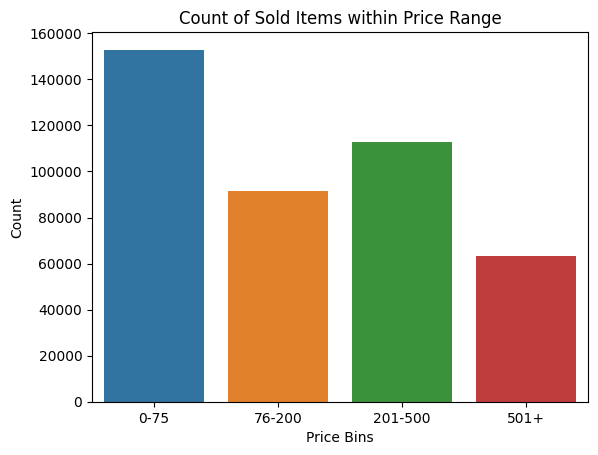

In [9]:
bar_plot = sns.countplot(data=sales, x=sales['price_bin']);
bar_plot.set(xlabel='Price Bins', ylabel='Count', title='Count of Sold Items within Price Range');

From the plot above, we see that there are more items in the $0-75 bin than any other bin. 

Let's drill down a little more (focusing on the sales that are less than $2000):

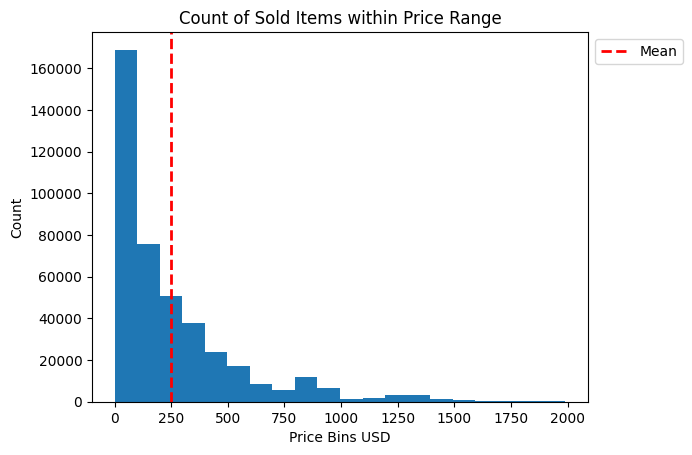

In [10]:
fig, ax = plt.subplots()
sales['price'] = sales[sales['price'] < 2000]['price']
plt.hist(sales['price'], bins=20)

# Labels
ax.set(xlabel='Price Bins USD', ylabel='Count', title='Count of Sold Items within Price Range')

# The vertial "mean" line
ax.axvline(x=sales['price'].mean(), color='red', label='Mean', \
              linestyle='--', linewidth=2)

# Legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

### Sales over Time

In [11]:
sales.sort_values(by = ['event_date'], ascending=True, inplace=True)
display(sales.head())
display(sales.tail())

,event_datetime,event_date,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,price_bin
55942,1970-01-01 00:33:40 UTC,1970-01-01,00:33:40,2348533155973038728,1515966223509259282,2.268105e+18,appliances.kitchen.washer,indesit,198.13,1.515916e+18,76-200
47269,1970-01-01 00:33:40 UTC,1970-01-01,00:33:40,2348532291308880575,1515966223509090066,2.268105e+18,electronics.video.tv,lg,532.38,1.515916e+18,501+
47264,1970-01-01 00:33:40 UTC,1970-01-01,00:33:40,2348532290545517242,2273948283321712726,2.268105e+18,furniture.living_room.cabinet,tvs,7.38,1.515916e+18,0-75
47263,1970-01-01 00:33:40 UTC,1970-01-01,00:33:40,2348532290545517242,1515966223509340712,2.268105e+18,furniture.kitchen.table,tvs,43.96,1.515916e+18,0-75
47256,1970-01-01 00:33:40 UTC,1970-01-01,00:33:40,2348532289807319735,1515966223509282208,2.268105e+18,computers.notebook,legrand,19.65,1.515916e+18,0-75


,event_datetime,event_date,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,price_bin
2633338,2020-11-21 06:25:29 UTC,2020-11-21,06:25:29,2388440981134693789,2273948245564589041,2.268105e+18,appliances.kitchen.kettle,tefal,40.49,1.515916e+18,0-75
2633339,2020-11-21 06:26:38 UTC,2020-11-21,06:26:38,2388440981134693790,2273948222697243328,2.268105e+18,appliances.kitchen.microwave,ava,67.11,1.515916e+18,0-75
2633340,2020-11-21 06:26:57 UTC,2020-11-21,06:26:57,2388440981134693791,2388434452476154284,2.268105e+18,electronics.smartphone,xiaomi,162.01,1.515916e+18,76-200
2633322,2020-11-21 06:06:21 UTC,2020-11-21,06:06:21,2388440981134693775,2388434452473940468,2.268105e+18,electronics.smartphone,xiaomi,127.29,1.515916e+18,76-200
2633520,2020-11-21 10:10:30 UTC,2020-11-21,10:10:30,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18,0-75


Looks like there are some sales that have a date in the year 1970. We'll remove those from the data set and just focus on sales that we are certain have occured in the year 2020. 

In [12]:
_2020_df = sales[sales['event_date'] >= '2020/01/01']
_2020_df.head()

,event_datetime,event_date,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,price_bin
66111,2020-01-05 04:56:31 UTC,2020-01-05,04:56:31,2348710122416505096,1515966223509089264,2.268105e+18,appliances.kitchen.refrigerators,beko,219.88,1.515916e+18,201-500
66110,2020-01-05 04:56:31 UTC,2020-01-05,04:56:31,2348710122416505096,1515966223509089283,2.268105e+18,electronics.smartphone,oppo,208.31,1.515916e+18,201-500
66085,2020-01-05 06:54:35 UTC,2020-01-05,06:54:35,2348710119757316345,1515966223509104732,2.268105e+18,electronics.audio.headphone,hyperx,136.55,1.515916e+18,76-200
65985,2020-01-05 09:32:42 UTC,2020-01-05,09:32:42,2348710110286577864,1515966223509255546,2.268105e+18,computers.network.router,d-link,11.55,1.515916e+18,0-75
65735,2020-01-05 08:29:56 UTC,2020-01-05,08:29:56,2348710080616071249,2273948310173647243,2.268105e+18,appliances.environment.vacuum,xiaomi,439.79,1.515916e+18,201-500


In [13]:
# Error handling
pd.options.mode.chained_assignment = None

_2020_df['month'] = _2020_df['event_date'].dt.month

import calendar
_2020_df['month'] = _2020_df['month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
grouped_by_month_df = _2020_df.groupby('month')['price'].sum()

months_in_order = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', \
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

df_sorted = grouped_by_month_df.reindex(months_in_order, axis=0)

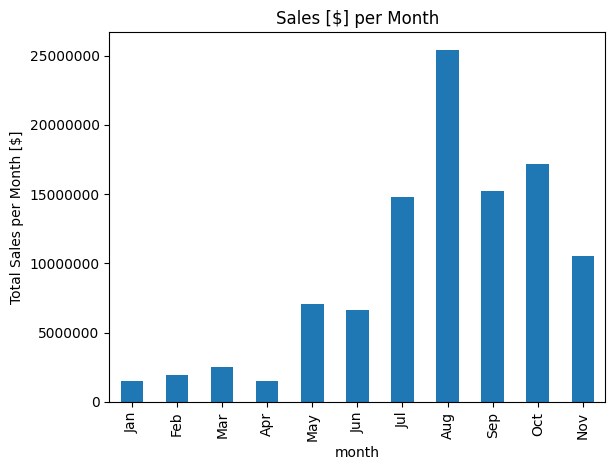

In [15]:
f = plt.figure()
plt.ticklabel_format(style = 'plain')
plt.xlabel('Months')
plt.ylabel('Total Sales per Month [$]')
plt.title('Sales [$] per Month')
df_sorted.plot(kind='bar', ax=f.gca());
plt.show();

To drill down a little more, let's see the daily sales for the same time period:

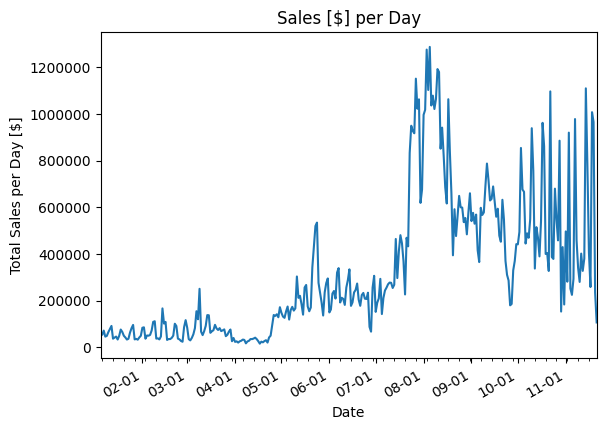

In [16]:
import matplotlib.dates as mdates
import datetime as dt     

grouped_by_date_df = _2020_df.groupby([_2020_df['event_date']])['price'].sum()

#f = plt.figure()
plt.ticklabel_format(style = 'plain')
ax = grouped_by_date_df.plot(kind='line', x='event_date', y='price');
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Total Sales per Day [$]')
plt.title('Sales [$] per Day')

plt.show();

### Machine Learning (Multiple Linear Regression) to Forecast Sales

In [17]:
reset_df = grouped_by_date_df.reset_index()
reset_df['one_day_back'] = reset_df['price'].shift(+1)
reset_df['two_days_back'] = reset_df['price'].shift(+2)
reset_df['three_days_back'] = reset_df['price'].shift(+3)
reset_df = reset_df.dropna()

In [18]:
from sklearn.linear_model import LinearRegression
x1, x2, x3, y = reset_df['one_day_back'], reset_df['two_days_back'], reset_df['three_days_back'], reset_df['price']
x1, x2, x3, y = np.array(x1), np.array(x2), np.array(x3), np.array(y)
x1, x2, x3, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), y.reshape(-1,1)
final_x = np.concatenate((x1, x2, x3), axis=1)
# final_x is your array of input variables
# There are 321 rows of data

X_train, X_test, y_train, y_test = final_x[:256], final_x[257:], y[:256], y[257:]
model = LinearRegression().fit(final_x, y)

In [19]:
r_sq = model.score(final_x, y)
r_sq_rounded = round(r_sq, 2)
coef = np.round(model.coef_, 3)
print('The R^2 coefficient is ' + str(r_sq_rounded))
print('The model coefficient for x1 is ' + str(coef[0,0]))
print('The model coefficient for x2 is ' + str(coef[0,1]))
print('The model coefficient for x3 is ' + str(coef[0,2]))

The R^2 coefficient is 0.74
The model coefficient for x1 is 0.59
The model coefficient for x2 is 0.096
The model coefficient for x3 is 0.221


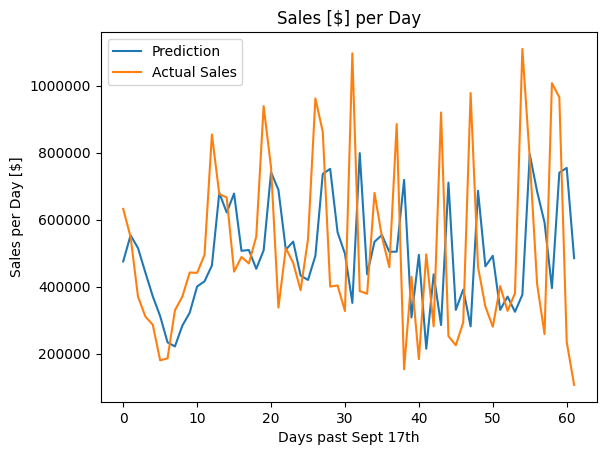

In [20]:
pred = model.predict(X_test)

plt.plot(pred, label='Prediction')
plt.plot(y_test, label='Actual Sales')

# Formatting
plt.ticklabel_format(style = 'plain')

# Labels and stuff
plt.xlabel('Days past Sept 17th')
plt.ylabel('Sales per Day [$]')
plt.title('Sales [$] per Day')
plt.legend(loc="upper left")

plt.show();

What's neat about the prediction plot above is that the 'prediction' curve appears to react to increases/decreases in the sales volume. There are many sharp spikes in the actual sales curve. The prediction curve does a good job of tracking the actual sales. 

### Total Revenue by Category ID

In [21]:
grouped_by_cat_df = _2020_df.groupby('category_code')['price'].sum().reset_index()
grouped_by_cat_df = grouped_by_cat_df.sort_values(by=['price'], ascending=False)
display(grouped_by_cat_df.head(10))

,category_code,price
88,electronics.smartphone,41082041.24
58,computers.notebook,13633420.52
30,appliances.kitchen.refrigerators,8534872.45
92,electronics.video.tv,8056003.00
33,appliances.kitchen.washer,4890769.45
13,appliances.environment.vacuum,2427181.44
89,electronics.tablet,2327821.95
87,electronics.clocks,2158959.17
9,appliances.environment.air_conditioner,1826364.85
23,appliances.kitchen.hood,1796722.62


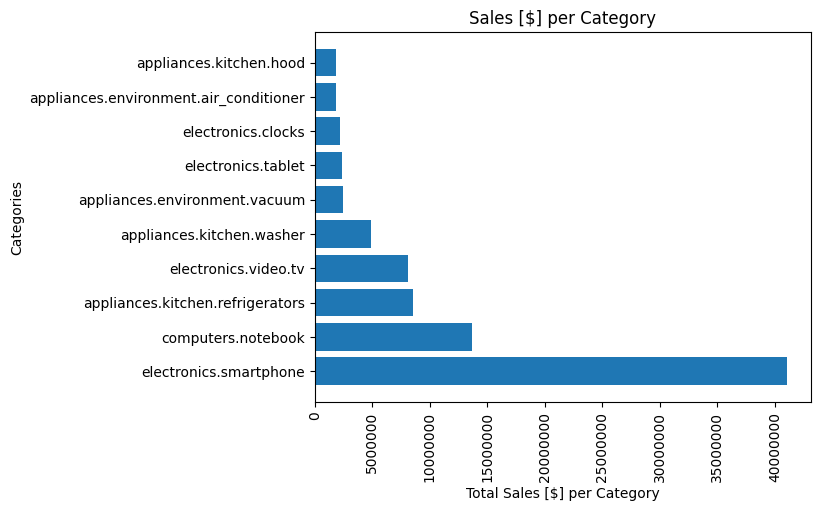

In [22]:
f = plt.figure()
plt.ticklabel_format(style = 'plain')
plt.xlabel('Total Sales [$] per Category')
plt.ylabel('Categories')
plt.title('Sales [$] per Category')

#x = top_10_categories['category_code']
#y = top_10_categories['price']

x = grouped_by_cat_df['category_code'].iloc[0:10]
y = grouped_by_cat_df['price'].iloc[0:10]

plt.barh(x, y)
plt.xticks(rotation=90)

plt.show();

### Conclusion & Recommendations for Further Research

- What are the margins on each sale?
- What changed on within the business (additional marketing, new B2B business, etc.) that caused the jump in sales in May?
- Consider going all in on smartphone and computer notebook sales. Can the company make these products a larger part of their business?
